In [2]:
import pandas as pd
from scipy.stats import zscore
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../data/benin-malanville.csv")

# Summary statistics for all numeric columns
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


In [4]:
# Missing values per column
missing = df.isna().sum()
missing[missing > 0]

# Columns with >5% missing
threshold = len(df) * 0.05
missing[missing > threshold]

Comments    525600
dtype: int64

In [6]:
key_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Z-scores
z_scores = df[key_cols].apply(zscore)

# Flag rows with outliers (|Z| > 3)
outliers = (np.abs(z_scores) > 3)
df['outlier'] = outliers.any(axis=1)

# Median imputation for missing values
df[key_cols] = df[key_cols].apply(lambda x: x.fillna(x.median()))

# Drop remaining rows with any NaNs (optional)
# df = df.dropna()

# Export cleaned data
df.to_csv("../data/benin_clean.csv", index=False)

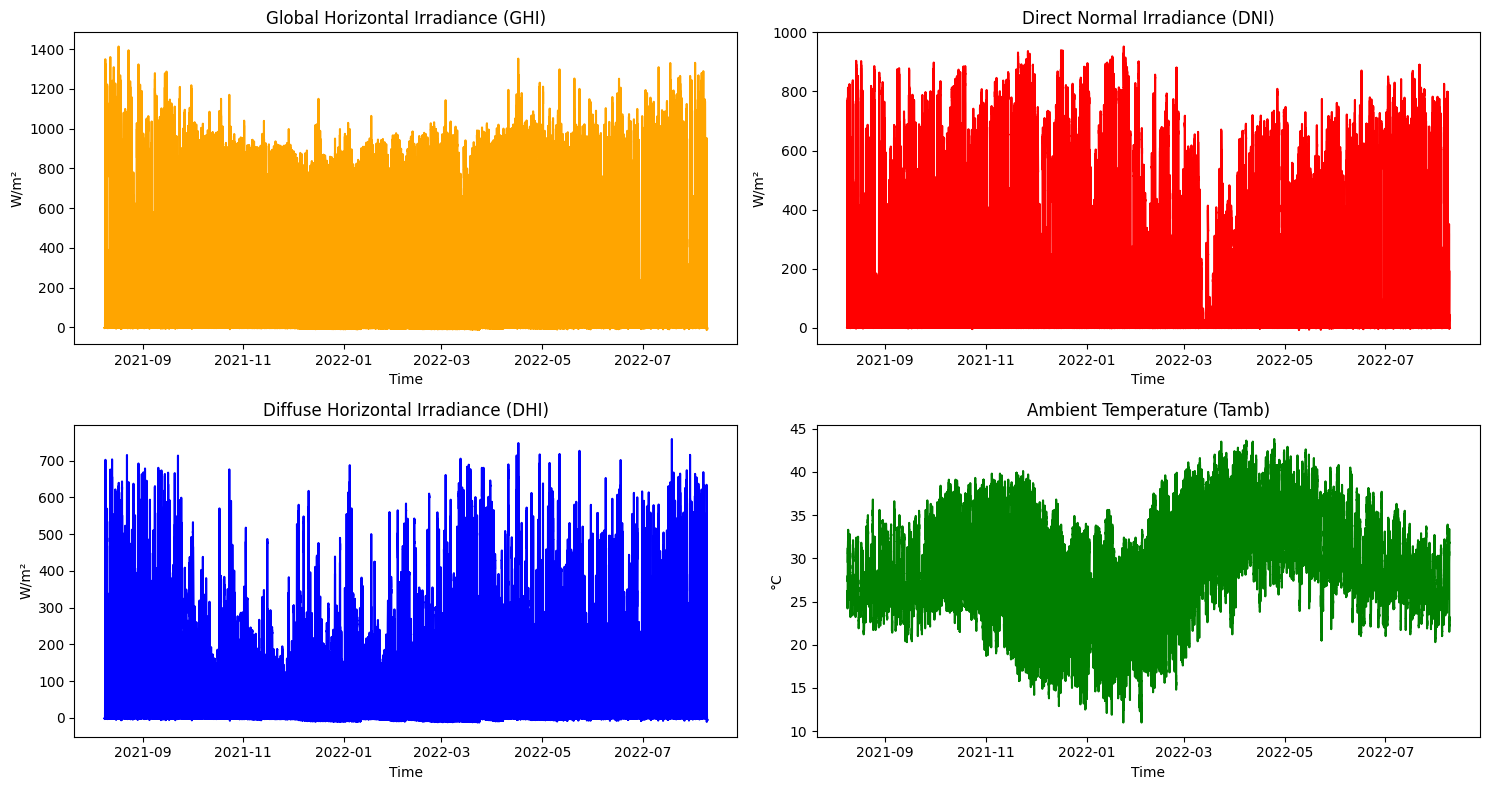

In [8]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
plt.plot(df['Timestamp'], df['GHI'], label='GHI', color='orange')
plt.title('Global Horizontal Irradiance (GHI)')
plt.xlabel('Time')
plt.ylabel('W/m²')

plt.subplot(2, 2, 2)
plt.plot(df['Timestamp'], df['DNI'], label='DNI', color='red')
plt.title('Direct Normal Irradiance (DNI)')
plt.xlabel('Time')
plt.ylabel('W/m²')

plt.subplot(2, 2, 3)
plt.plot(df['Timestamp'], df['DHI'], label='DHI', color='blue')
plt.title('Diffuse Horizontal Irradiance (DHI)')
plt.xlabel('Time')
plt.ylabel('W/m²')

plt.subplot(2, 2, 4)
plt.plot(df['Timestamp'], df['Tamb'], label='Ambient Temp (Tamb)', color='green')
plt.title('Ambient Temperature (Tamb)')
plt.xlabel('Time')
plt.ylabel('°C')

plt.tight_layout()
plt.show()


In [10]:
# Assume outliers = dirty, non-outliers = clean
df['Cleaned'] = ~df['outlier']  # Invert to say outlier=False → cleaned=True

['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA', 'TModB', 'Comments', 'outlier', 'Cleaned']


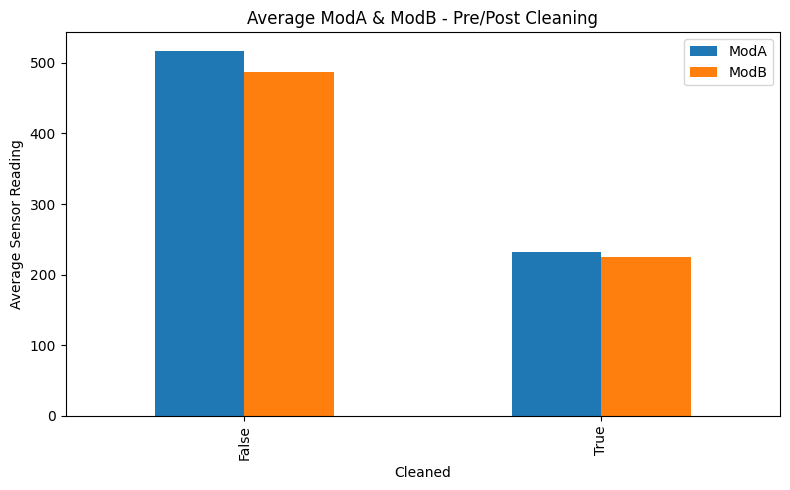

In [11]:
# Ensure 'Cleaned' or equivalent column exists
print(df.columns.tolist())

# Group and plot
cleaning_avg = df.groupby('Cleaned')[['ModA', 'ModB']].mean().reset_index()

cleaning_avg.plot(kind='bar', x='Cleaned', figsize=(8, 5), title='Average ModA & ModB - Pre/Post Cleaning')
plt.ylabel("Average Sensor Reading")
plt.tight_layout()
plt.show()

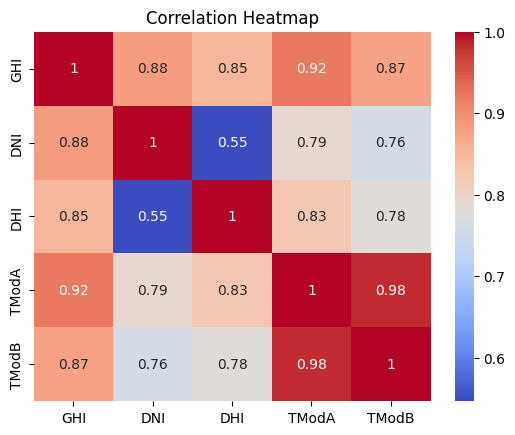

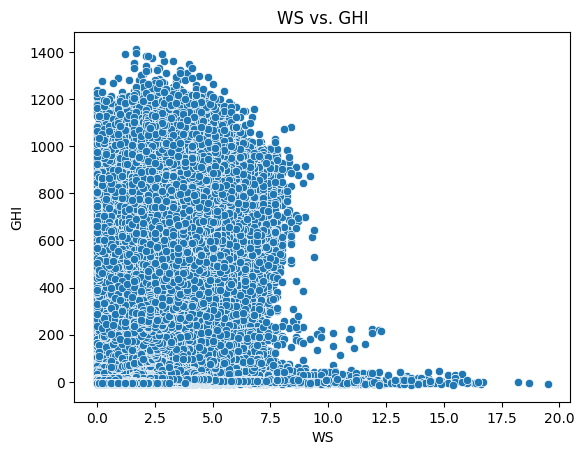

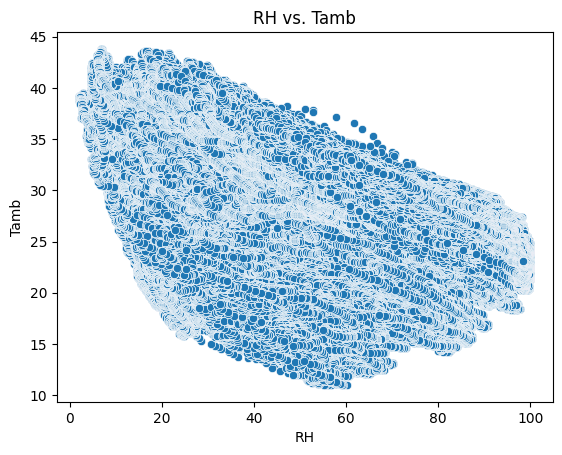

In [12]:
# Correlation heatmap
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
sns.heatmap(df[corr_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Scatter plots
sns.scatterplot(data=df, x='WS', y='GHI')
plt.title("WS vs. GHI")
plt.show()

sns.scatterplot(data=df, x='RH', y='Tamb')
plt.title("RH vs. Tamb")
plt.show()


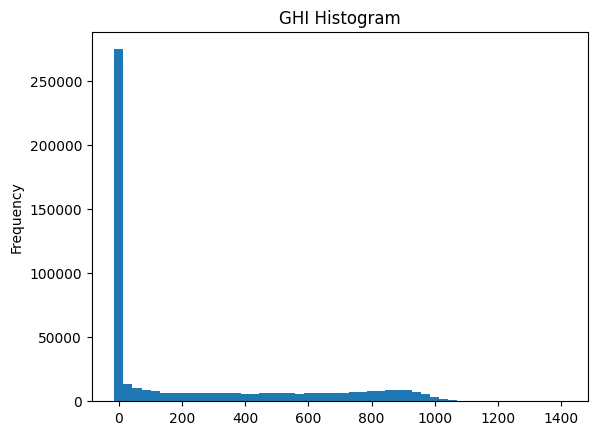

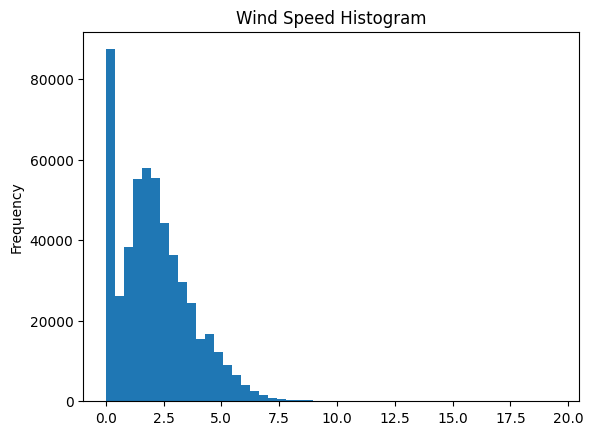

In [13]:
# Histogram
df['GHI'].plot(kind='hist', bins=50, title='GHI Histogram')
plt.show()

df['WS'].plot(kind='hist', bins=50, title='Wind Speed Histogram')
plt.show()

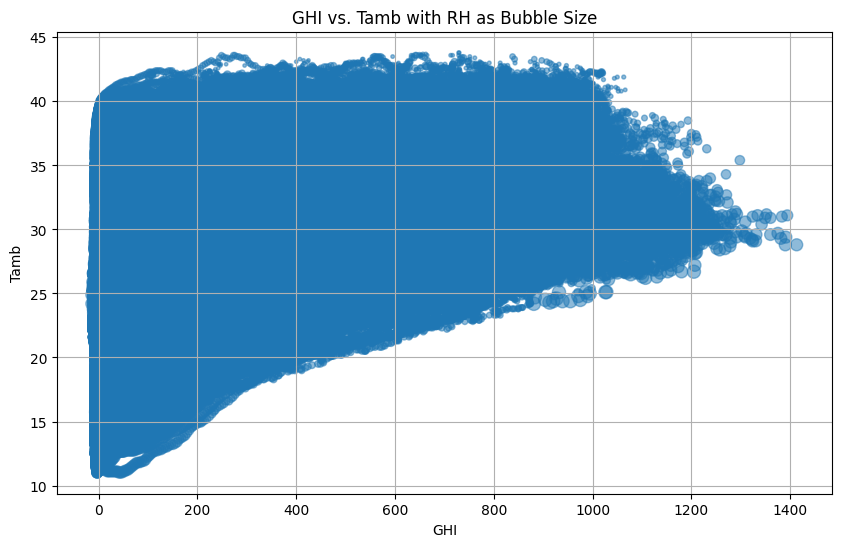

In [14]:
# Bubble chart
plt.figure(figsize=(10, 6))
plt.scatter(df['GHI'], df['Tamb'], s=df['RH'], alpha=0.5)
plt.xlabel("GHI")
plt.ylabel("Tamb")
plt.title("GHI vs. Tamb with RH as Bubble Size")
plt.grid(True)
plt.show()